# Computer Vision - P1

### **Carefully read the following instructions before start coding.**

·**np.mean** --> To make images look as a binary image deppending on the mean mask

·**Embed an image inside a frame** --> Embed an image inside a black frame 10% larger

·**Contrast enhancement** --> Manipulate contrast and enhance it using direct enhancement and scikit function enhancement.

·**Color channel manipulation** --> Change channels, manipulate them, etc

·**Print different color channels of an image with background** --> Using alpha to manipulate it

·**Masks and logical image manipulation** --> Filter or get image pieces deending on mask. i.e. clothes changing

·**Apply texture to image**

==============================================================================================
## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P1_Student1_Student2.zip** that includes:
    - The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): October, 3, 2023 23:00 h**

==============================================================================================

## Practicum 1: Basics on Image Processing and Manipulation
==============================================================================================

The main topics are:

1. Image loading, saving and creation

2. Color manipulation

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

==============================================================================================
### Packages loading

First we need to import the required Python packages for basic image manipulation.

Run the following code:

In [2]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the
notebook**):

In [3]:
%matplotlib inline

==============================================================================================
### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 300 columns where each value should be of type unsigned integer with 8 bits.

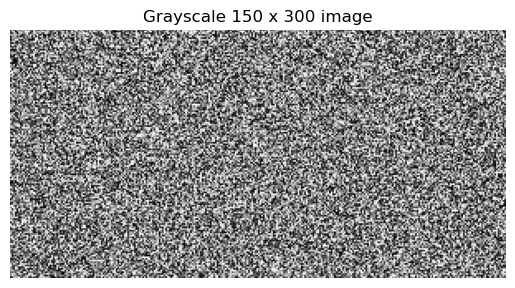

In [13]:
image = np.random.randint(0, 256, (150,300), dtype=np.uint8)
plt.title("Grayscale 150 x 300 image")
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.show()


How many different values can each pixel have in this case?

In [ ]:
256


b) Create and display a **RGB image** that has 200 rows and 200 columns where each value should be of type unsigned integer with 8 bits. Then, transform it to grayscale.:

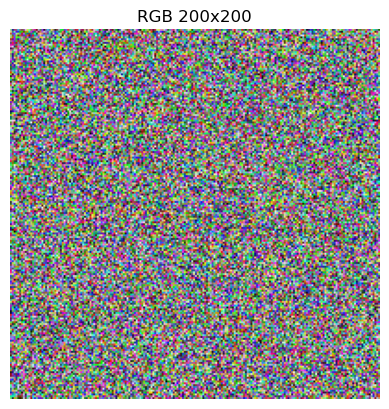

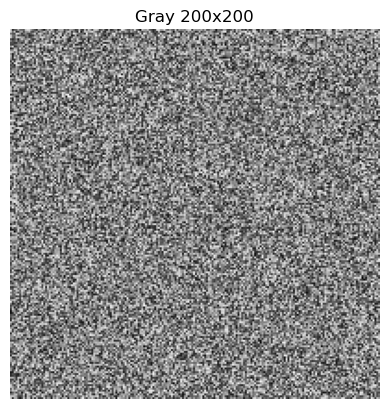

In [12]:
from skimage.color import rgb2gray # Needed for transformation
image = np.random.randint(0, 256, (200,200,3), dtype=np.uint8)
#It is an image of dimension 3
plt.title("RGB 200x200")
plt.imshow(image)
plt.axis("off")
plt.show()

gray_image = rgb2gray(image)
plt.title("Gray 200x200")
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.show()

c) Change the color of the pixels of the image in section **a)** in such a way that the right half is white (255) and the left half is black (0).

Visualize the image and print the values of its first row.

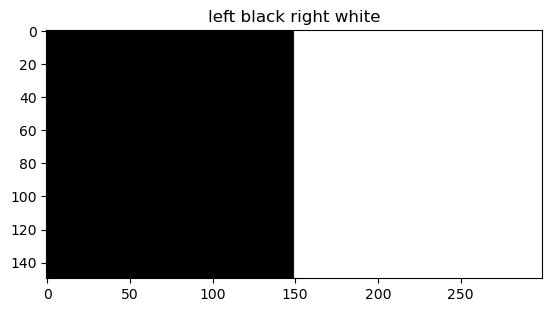

In [24]:
image[:,0:150] = 0  # Black for the left half
image[:,150:] = 255 # White for the right half
plt.title("left black right white")
plt.imshow(image, cmap='gray')
plt.show()


d) Flip the image to create a mirror ilusion.

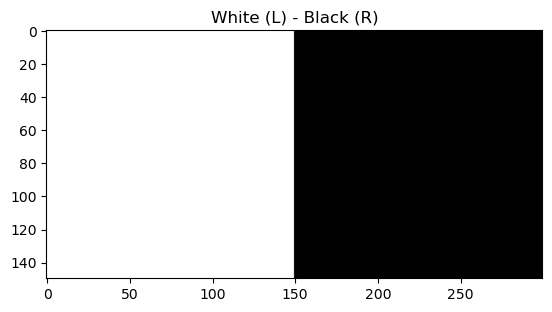

Signature: np.flip(m, axis=None)
Source:   
@array_function_dispatch(_flip_dispatcher)
def flip(m, axis=None):
    """
    Reverse the order of elements in an array along the given axis.

    The shape of the array is preserved, but the elements are reordered.

    .. versionadded:: 1.12.0

    Parameters
    ----------
    m : array_like
        Input array.
    axis : None or int or tuple of ints, optional
         Axis or axes along which to flip over. The default,
         axis=None, will flip over all of the axes of the input array.
         If axis is negative it counts from the last to the first axis.

         If axis is a tuple of ints, flipping is performed on all of the axes
         specified in the tuple.

         .. versionchanged:: 1.15.0
            None and tuples of axes are supported

    Returns
    -------
    out : array_like
        A view of `m` with the entries of axis reversed.  Since a view is
        returned, this operation is done in constant time.

    S

In [25]:
image = np.flip(image, axis=1)  # Flip the array by the horizontal direction
plt.title("White (L) - Black (R)")
plt.imshow(image, cmap='gray')
plt.show()

### 1.2 Image saving and loading

a) Use the IO image package to save the previously image:

In [26]:
from skimage import io # Needed to save the image
io.imsave('images_notebook/white_black.bmp',image) #save the generated image "image" to images_notebook

b) Load the saved image and visualize it. Print the dimensions, the value of pixel (10,50) and data type in order to check everything is correct

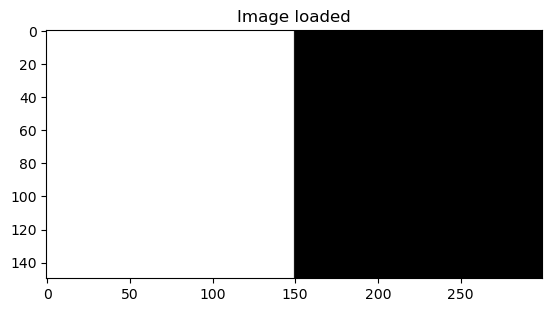

Dimensions: (150, 300)
Value pixel (10,50): 255
Data type: uint8


In [33]:
loaded_image = io.imread('images_notebook/white_black.bmp')
#Visualize
plt.title("Image loaded")
plt.imshow(loaded_image, cmap="gray")
plt.show()

print(f"Dimensions: {loaded_image.shape}\nValue pixel (10,50): {loaded_image[10,50]}\nData type: {loaded_image.dtype}")

### 1.3 Color image manipulation

a) Load and show the image `images_notebook/dog.jpg`, and check its dimensions and data type.

**Note:** Pictures may appear in the figure with pseudocolors. What commands to use in order to display them in **RGB** color and in **grayscale**?!

We can define the cmap parameter to 'gray' to define the gray map for grayscale images (2D arrays). RGB images are shown in color by default. We use imshow() for both types of images.

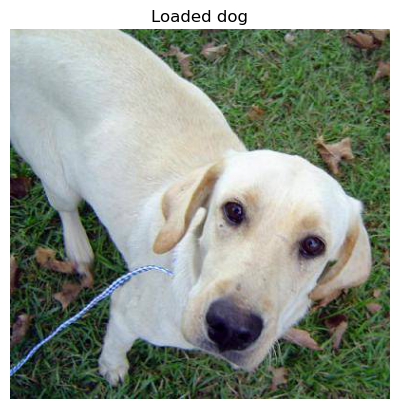

Dimensions: (390, 400, 3)
Data type: uint8


In [39]:
loaded_dog = io.imread('images_notebook/dog.jpg')
plt.title("Loaded dog")
plt.imshow(loaded_dog)
plt.axis("off")
plt.show()

# Dimensions and data type
print(f"Dimensions: {loaded_dog.shape}\nData type: {loaded_dog.dtype}")

b) Convert the previous image to grayscale, and **save it**.

Moreover, plot the two images (RGB & greyscale) in a single figure, and show details such as shape, dtype, max and min values.

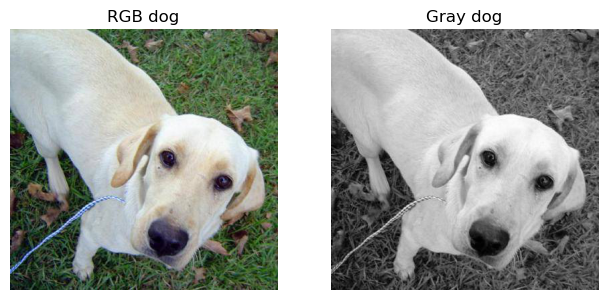

Showing details (RGB dog - gray dog):
	- Shape: (390, 400, 3) - (390, 400)
	- Data type: uint8 - uint8
	- Max value: 255 - 254
	- Min value: 0 - 1


In [49]:
from skimage.util import img_as_ubyte # Needed to transform the [0,1] float image from rgb2gray() to an uint8 image

gray_dog = img_as_ubyte(rgb2gray(loaded_dog))

fig = plt.figure(figsize=(20,30))
# First image: RGB dog
fig.add_subplot(5, 5, 1)
plt.title("RGB dog")
plt.imshow(loaded_dog)
plt.axis('off')

# First image: RGB dog
fig.add_subplot(5, 5, 2)
plt.title("Gray dog")
plt.imshow(gray_dog, cmap="gray")
plt.axis('off')

plt.show()

# Showing details asked
print("Showing details (RGB dog - gray dog):")
print(f"\t- Shape: {loaded_dog.shape} - {gray_dog.shape}")
print(f"\t- Data type: {loaded_dog.dtype} - {gray_dog.dtype}")
print(f"\t- Max value: {loaded_dog.max()} - {gray_dog.max()}")
print(f"\t- Min value: {loaded_dog.min()} - {gray_dog.min()}")

c) Compute the mean of the previous grayscale image and use a logical operation to obtain a boolean image. Pixels greather than the mean value must be shown as white. Display the binary image.

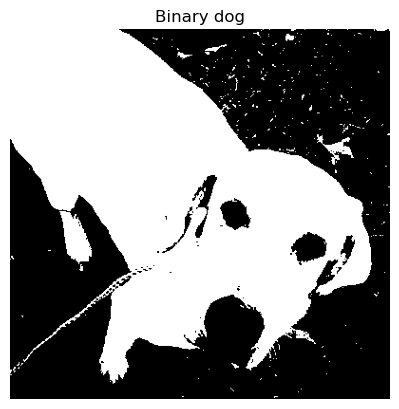

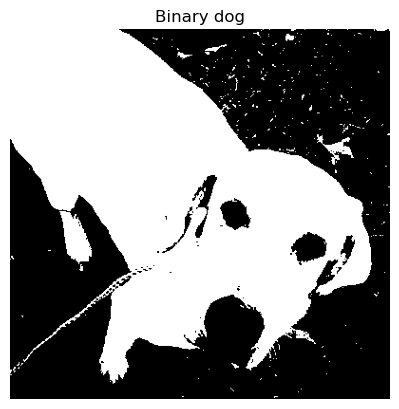

In [62]:
# Construction of binary image, with binary mask
bin_dog = (gray_dog > gray_dog.mean())

# Visualize it
plt.title("Binary dog")
plt.imshow(bin_dog, cmap='gray')
plt.axis('off')
plt.show()

#ALTERNATIVA
mean = np.mean(gray_dog)
boolean_dog = np.zeros_like(gray_dog)
boolean_dog[gray_dog > mean]=1
boolean_dog[gray_dog <= mean]=0
plt.title("Binary dog")
plt.imshow(boolean_dog, cmap='gray')
plt.axis('off')
plt.show()

d) Visualize in the same figure all the three images: (1) the original image, (2) the gray image, and (3) the binarized image. Set the corresponding titles of the images and their descriptions

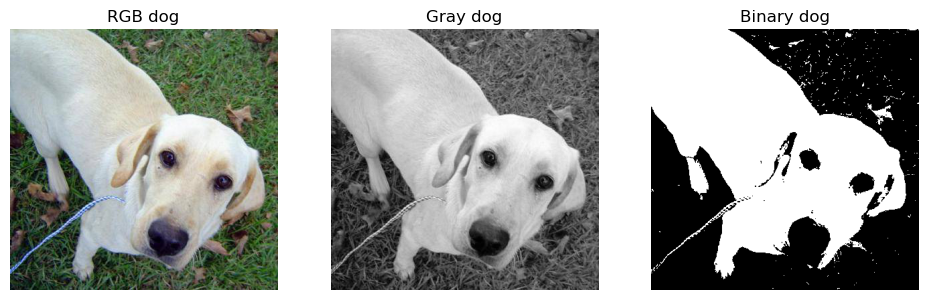

In [74]:
fig = plt.figure(figsize=(20,30))

# First image: RGB dog
fig.add_subplot(5, 5, 1)
plt.title("RGB dog")
plt.imshow(loaded_dog)
plt.axis('off')

# Second image: gray dog
fig.add_subplot(5, 5, 2)
plt.title("Gray dog")
plt.imshow(gray_dog, cmap='gray')
plt.axis('off')

# Third image: binary dog
fig.add_subplot(5, 5, 3)
plt.title("Binary dog")
plt.imshow(bin_dog, cmap='gray')
plt.axis('off')

# Plot the images
plt.show()

### 1.4 Images manipulation

a) Create an RGB black image, 10% larger than the dog image. Afterwards, embed the dog image in the center. Show the framed image.

**Note:** Be carefull with the number of channels.

**Note:** Print the original image shape and the new image size to check if the sizes of the second one are 10% larger then the first one.


b) Change the frame of the new image to green. Visualize the three images: original, black frame and green frame, in one single figure, with their respective titles.

In [84]:
# Construct a RGB green image (10% larger than the dog image)
x1,y1 = loaded_dog.shape[:2]
x2,y2 = x1//10 + x1, y1//10 + y1
green = np.((x2, y2, 3), dtype=np.uint8)
green_image[:, :, 1] = 255

# Obtain the offset to show the image centered (a,b are computed in case the division is not exact, to adjust sizes)
x,y = (x2 - x1) // 2, (y2 - y1) // 2
a,b = (x2 - x1) % 2, (y2 - y1) % 2

# Embed the dog image in the center
framed_dog[x:-x-a,y:-y-b,:] = loaded_dog[:,:,:]
plt.title("Black frame dog")
plt.imshow(framed_dog)
plt.axis('off')
plt.show()

print(f"Original shape: {loaded_dog.shape} Framed dog: {framed_dog.shape}")RGB black image (10% larger than the dog image)
x1,y1 = loaded_dog.shape[:2]
x2,y2 = x1//10 + x1, y1//10 + y1
framed_dog = np.zeros((x2, y2, 3), dtype=np.uint8)

# Obtain the offset to show the image centered (a,b are computed in case the division is not exact, to adjust sizes)
x,y = (x2 - x1) // 2, (y2 - y1) // 2
a,b = (x2 - x1) % 2, (y2 - y1) % 2

# Embed the dog image in the center
framed_dog[x:-x-a,y:-y-b,:] = loaded_dog[:,:,:]
plt.title("Black frame dog")
plt.imshow(framed_dog)
plt.axis('off')
plt.show()

print(f"Original shape: {loaded_dog.shape} Framed dog: {framed_dog.shape}")

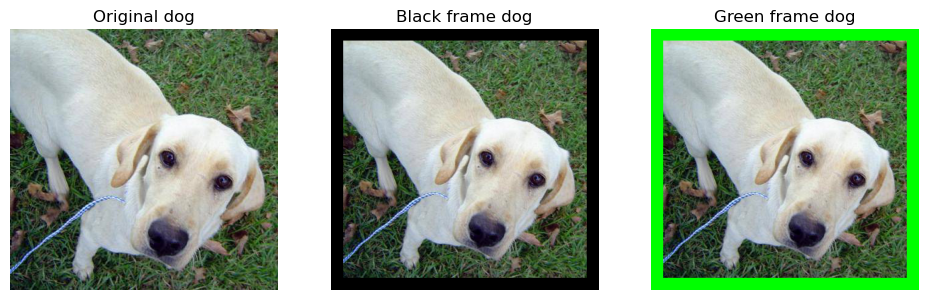

In [90]:
# Construct a RGB green image (10% larger than the dog image)
x1,y1 = loaded_dog.shape[:2]
x2,y2 = x1//10 + x1, y1//10 + y1
green_framed = np.zeros((x2, y2, 3), dtype=np.uint8)
green_framed[:, :, 1] = 255

# Obtain the offset to show the image centered (a,b are computed in case the division is not exact, to adjust sizes)
x,y = (x2 - x1) // 2, (y2 - y1) // 2
a,b = (x2 - x1) % 2, (y2 - y1) % 2

# Embed the dog image in the center
green_framed[x:-x-a,y:-y-b,:] = loaded_dog[:,:,:]

fig = plt.figure(figsize=(20,30))

# First image: original dog
fig.add_subplot(5, 5, 1)
plt.title("Original dog")
plt.imshow(loaded_dog)
plt.axis('off')

# Second image: black frame
fig.add_subplot(5, 5, 2)
plt.title("Black frame dog")
plt.imshow(framed_dog)
plt.axis('off')

# Third image: green frame
fig.add_subplot(5, 5, 3)
plt.title("Green frame dog")
plt.imshow(green_framed)
plt.axis('off')

plt.show()


### 1.5 Contrast enhancement

a) Open the image `images_notebook/car_lowContrast.jpg` and visualize it without graylevel enhancement. Print the image size, data type, minimum and maximum of the image.

**Note:** When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default. To this purpose, check the data type and used the maximum and minimum value corresponding to this type.


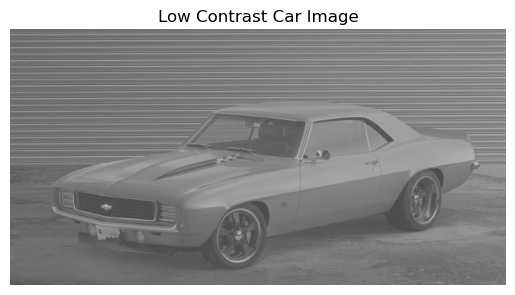

Size: (371, 720)
Data type: uint8
Minimum: 63
Maximum: 193


In [102]:
car_image = io.imread('images_notebook/car_lowContrast.jpg')

# Visualize the image without graylevel enhancement
plt.imshow(car_image, cmap='gray', vmin=0, vmax=255) #If we don't put this vmin and vmax, the image would be auto-enhanced
#what auto-enhanced does: vmin=np.min(car_image): This sets the minimum intensity value for the colormap. It ensures that the lowest intensity value in the image corresponds to the lowest value in the colormap.
plt.title("Low Contrast Car Image")
plt.axis("off")
plt.show()

print(f'Size: {car_image.shape}\nData type: {car_image.dtype}\nMinimum: {car_image.min()}\nMaximum: {car_image.max()}')

b) Create an image called `dark_image` using the  values from the original one. Compute the minimum value of the image and substract this value of the original image. Print the new maximum a minimum values. Show the new image without graylevel enhancement.

Minimum: 0
Maximum: 130


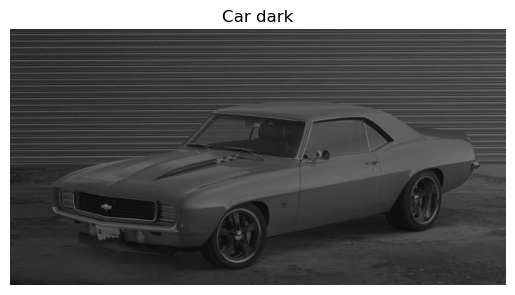

In [106]:
dark_image = car_image.copy()

min_val = dark_image.min()
max_val = dark_image.max()
# All the image gets darker 
dark_image -= dark_image.min()

# Print new values
print(f'Minimum: {dark_image.min()}\nMaximum: {dark_image.max()}')

# Visualize image without enhancement
plt.imshow(dark_image, cmap='gray', vmin=0, vmax=255)
plt.title("Car dark")
plt.axis('off')
plt.show()

c) Similarly to the previous question, create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and show the new image without graylevel enhancement.


Minimum: 125
Maximum: 255


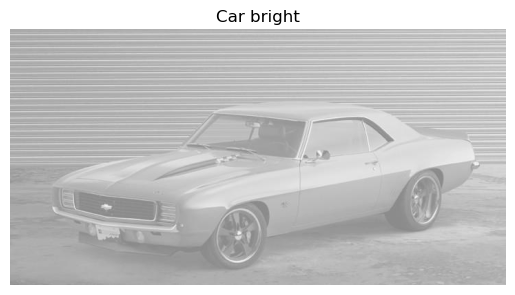

In [108]:
bright_image = car_image.copy()

min_val = bright_image.min()
max_val = bright_image.max()
# All the image gets darker 
bright_image += (255 - bright_image.max())

# Print new values
print(f'Minimum: {bright_image.min()}\nMaximum: {bright_image.max()}')

# Visualize image without enhancement
plt.imshow(bright_image, cmap='gray', vmin=0, vmax=255)
plt.title("Car bright")
plt.axis('off')
plt.show()

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command [rescale_intensity](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity). Check the minimal and maximal values of the enhanced image, and compare them with the previous one. Show the two images  without graylevel enhancement.

In [123]:
from skimage import exposure
help(exposure)

Help on package skimage.exposure in skimage:

NAME
    skimage.exposure

PACKAGE CONTENTS
    _adapthist
    exposure
    histogram_matching
    tests (package)

FUNCTIONS
    adjust_gamma(image, gamma=1, gain=1)
        Performs Gamma Correction on the input image.
        
        Also known as Power Law Transform.
        This function transforms the input image pixelwise according to the
        equation ``O = I**gamma`` after scaling each pixel to the range 0 to 1.
        
        Parameters
        ----------
        image : ndarray
            Input image.
        gamma : float, optional
            Non negative real number. Default value is 1.
        gain : float, optional
            The constant multiplier. Default value is 1.
        
        Returns
        -------
        out : ndarray
            Gamma corrected output image.
        
        See Also
        --------
        adjust_log
        
        Notes
        -----
        For gamma greater than 1, the histogram

(0) minimum: 63
(0) maximum: 193
(1) minimum: 0
(1) maximum: 255
(2) minimum: 0
(2) maximum: 255


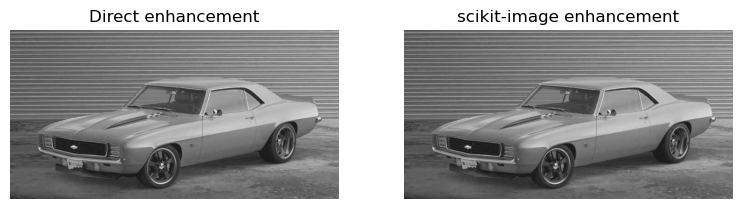

In [111]:
from skimage.exposure import rescale_intensity

fig = plt.figure(figsize=(50,50))

# (0) original image
print(f'(0) minimum: {car_image.min()}\n(0) maximum: {car_image.max()}')

# (1) direct manipulation
img_1 = ((car_image - car_image.min()) / (car_image.max() - car_image.min()) * 255).astype(np.uint8)
fig.add_subplot(10, 10, 1)
plt.title("Direct enhancement")
plt.imshow(img_1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
print(f'(1) minimum: {img_1.min()}\n(1) maximum: {img_1.max()}')

# (2) scikit-image command

img_2 = rescale_intensity(car_image)
fig.add_subplot(10, 10, 2)
plt.title("scikit-image enhancement")
plt.imshow(img_2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
print(f'(2) minimum: {img_2.min()}\n(2) maximum: {img_2.max()}')

# Plot the images
plt.show()

e) Visualize the 5 images in the same figure, each one with its corresponding title.

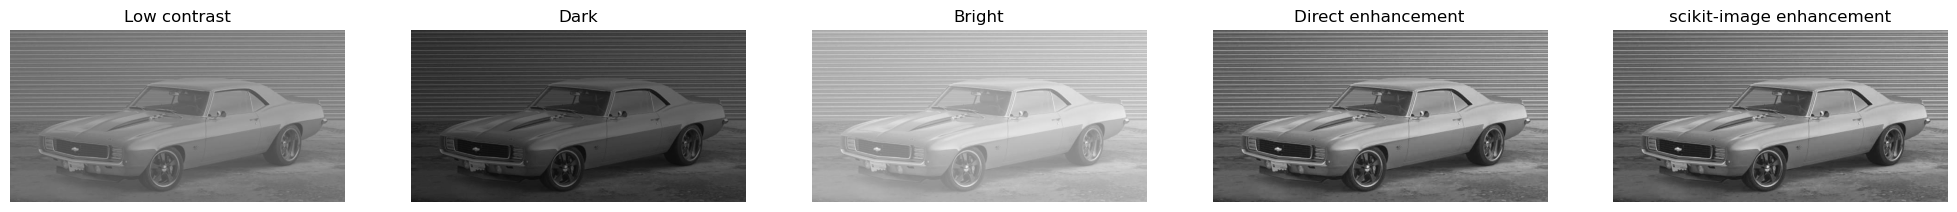

In [124]:
fig = plt.figure(figsize=(25,50))

# First image: low contrast car
fig.add_subplot(5, 5, 1)
plt.title("Low contrast")
plt.imshow(car_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Second image: dark car
fig.add_subplot(5, 5, 2)
plt.title("Dark")
plt.imshow(dark_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Third image: bright car
fig.add_subplot(5, 5, 3)
plt.title("Bright")
plt.imshow(bright_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Fourth image: direct enhancement
fig.add_subplot(5, 5, 4)
plt.title("Direct enhancement")
plt.imshow(img_1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Fifth image: scikit-image enhancement
fig.add_subplot(5, 5, 5)
plt.title("scikit-image enhancement")
plt.imshow(img_2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

### 1.6 Color manipulation

a) Read and visualize the image `images_notebook/Guell_Park.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/Guell_Park.jpg">

<img src="images_notebook/exchannels.png">

(440, 660, 3)


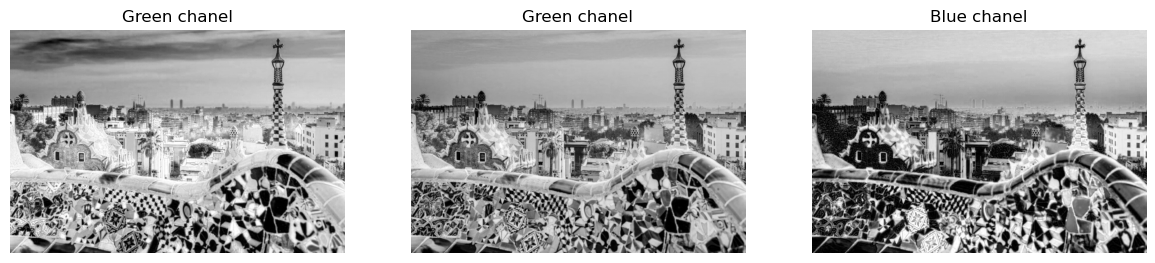

In [139]:
guell_img = io.imread("./images_notebook/Guell_Park.jpg")
red_channel=guell_img[:,:,0]
green_channel=guell_img[:,:,1]
blue_channel=guell_img[:,:,2]

fig = plt.figure(figsize=(25,50))

# First image: low contrast car
fig.add_subplot(5, 5, 1)
plt.title("Green chanel")
plt.imshow(red_channel, cmap='gray')
plt.axis('off')

# Second image: dark car
fig.add_subplot(5, 5, 2)
plt.title("Green chanel")
plt.imshow(green_channel, cmap='gray')
plt.axis('off')

# Third image: bright car
fig.add_subplot(5, 5, 3)
plt.title("Blue chanel")
plt.imshow(blue_channel, cmap='gray')
plt.axis('off')

plt.show()

b) Construct and visualize a new image, interchanging the red and green channels.

(440, 660, 3)


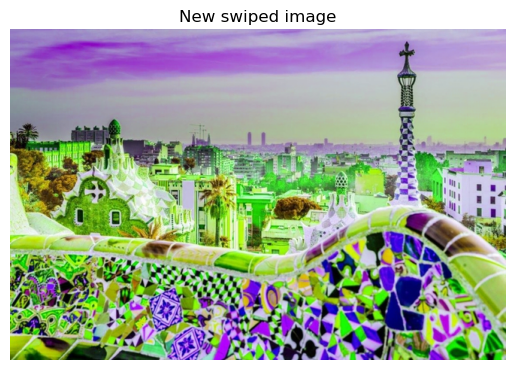

In [141]:
new_image = np.zeros((440,660,3), dtype=np.uint8)
new_image[:,:,0] = green_channel
new_image[:,:,1] = red_channel
new_image[:,:,2] = blue_channel
plt.title("New swiped image")
plt.imshow(new_image)
plt.axis('off')

#Other way to swipe:
#Concatena arrays de dimensio 2D amb el ordre que se li diu (de esquerra a dreta), com una pila, per tenir una imatge 3D
new_guell = np.dstack((green_channel, red_channel, blue_channel))


c) Read and visualize the image images_notebook/donald_trump.jpg. Use the the bottom figure as an example to create a modern piece of art, extracting its three channels and embedding the image to a colored background.
<img src="images_notebook/art_trump.jpg" width="400">

Hint:extract the channel, fill with zeros the other 2 color channels. Using the alpha channel of the RGBA image, set those transparent to a solid color.
In the image above we used the background colors: (255,255,0), (48,213,200) and (128,0,128)

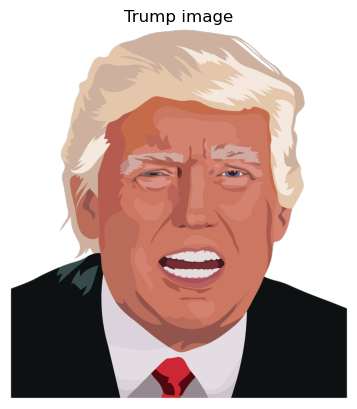

(1280, 1168, 4)


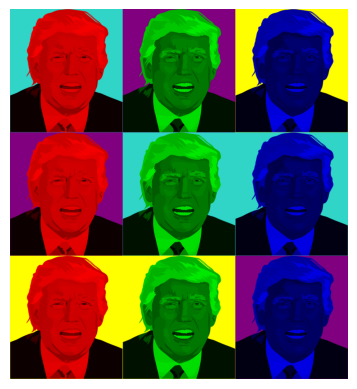

In [164]:
trump = io.imread('images_notebook/donald_trump.png')
plt.title("Trump image")
plt.imshow(trump)
plt.axis('off')
plt.show()
r=trump[:,:,0]
g=trump[:,:,1]
b=trump[:,:,2]
print(trump.shape)

zeros = np.zeros((1280, 1168), dtype=np.uint8)
trans = trump[:,:,3] == 0

#In order to deal with alpha-channel: trump[:,:,3]
red = np.dstack((r, zeros, zeros))
green = np.dstack((zeros, g, zeros))
blue = np.dstack((zeros, zeros, b))

# Background colors
yellow = [255,255,0]
purple = [128,0,128]
cyan = [48,213,200]

# Construct the images with the solid background. We create 3 vectors of the 3 images
images = np.array([[red.copy(), green.copy(), blue.copy()] for i in range(3)])
#In this case, we only put cyan to the red in first row, and blue and green in second
for i,j in [[0,0],[1,1],[1,2]]:
    #We put this color only in the values that are in background, so transparent = true
    images[i,j][trans] = cyan
for i,j in [[0,1],[1,0],[2,2]]:
    images[i,j][trans] = purple
for i,j in [[0,2],[2,0],[2,1]]:
    images[i,j][trans] = yellow

# Get the final image and visualize it
# hstack display them in horizontal and vstack in vertical. So all together make the grid of the solution
art = np.vstack((np.hstack(images[0]), np.hstack(images[1]), np.hstack(images[2])))
plt.axis("off")
plt.imshow(art)
plt.show()

### 1.7 Masks and logical image manipulation

a) Read the image `images_notebook/circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

In [1]:
# Load the image
circles = io.imread('images_notebook/circles.bmp')

# White images
left = np.ones(circles.shape, dtype=np.uint8)*255
central = np.ones(circles.shape, dtype=np.uint8)*255
right = np.ones(circles.shape, dtype=np.uint8)*255

# Color values: black, dark gray, light gray
# Unique function indicate the unique values that appear in circles
b, dg, lg = np.unique(circles)[:3]

# Masks, note circles.bmp is a RGB image, so all colors will have the same amount in each value, because is a black and white image
# [b]*3 is a 3 dim vector of b
left_mask = circles == [b]*3
central_mask = circles == [dg]*3
right_mask = circles == [lg]*3

# Copy only the corresponding circle
left[left_mask] = circles[left_mask]
central[central_mask] = circles[central_mask]
right[right_mask] = circles[right_mask]

fig = plt.figure(figsize=(20,30))

# First image: left circle
fig.add_subplot(5, 5, 1)
plt.title("Left circle")
plt.imshow(left, cmap='gray', vmin=0, vmax=255)

# Second image: central circle
fig.add_subplot(5, 5, 2)
plt.title("Central circle")
plt.imshow(central, cmap='gray', vmin=0, vmax=255)

# Third image: right circle
fig.add_subplot(5, 5, 3)
plt.title("Right circle")
plt.imshow(right, cmap='gray', vmin=0, vmax=255)

# Plot the images
plt.show()


NameError: name 'io' is not defined

b) Given the images `images_notebook/coat.png` and `images_notebook/model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying [resize, rotate, etc...](https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html) keep track how the image type and values range change. When necessary, apply type conversion using [img_as_float, img_as_uint, img_as_ubyte.](https://scikit-image.org/docs/stable/api/skimage.html)

**Note: DO NOT USE LOOPS to overlap the images!! It will be penalized.**


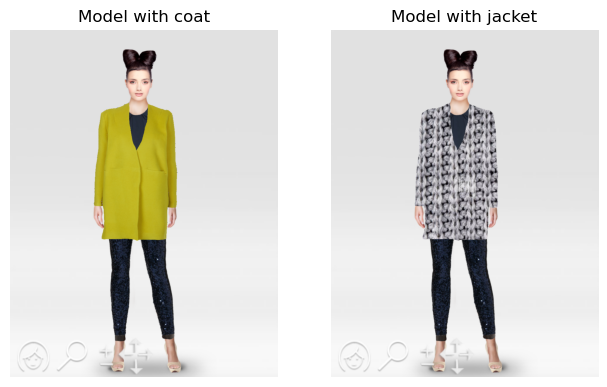

In [178]:
from skimage.color import rgba2rgb   # Needed to transform the images to RGB
from skimage.transform import resize # Needed to change the size of the texture image

# Load the images
# Convert an image to unsigned byte format, with values in [0, 255].Convert an image to unsigned byte format, with values in [0, 255].
coat = img_as_ubyte(rgba2rgb(io.imread('images_notebook/coat.png')))
model = img_as_ubyte(rgba2rgb(io.imread('images_notebook/model.png')))

# Find the coat positions and modify the model image
positions = coat != [0,0,0]
model[positions] = coat[positions]

fig = plt.figure(figsize=(20,30))

# First image: model with coat
fig.add_subplot(5, 5, 1)
plt.title("Model with coat")
plt.axis("off")
plt.imshow(model)

# Apply the jacket texture
texture = img_as_ubyte(resize(io.imread('images_notebook/jacket.jpg'), model.shape))
model[positions] = texture[positions]

# Second image: model with jacket
fig.add_subplot(5, 5, 2)
plt.title("Model with jacket")
plt.axis("off")
plt.imshow(model)

# Show images
plt.show()